### 라이브러리 불러오기
- 일부 라이브러리는 별도로 설치해야 합니다. 가상 환경에서 ```pip install requirements.txt```를 실행해 주세요.

- 가상 환경 설정 방법
    ```
    python -m venv env
    ```
    ```source env/bin/activate``` (Mac)

    ```env\Scripts\activate``` (Windows Command Prompt)

    ```venv\Scripts\Activate.ps1``` (Windows PowerShell)

    ```deactivate``` (to deactivate venv)

In [1]:
import time
import torch
import requests
import matplotlib.pyplot as plt

from PIL import Image
from vlm import VLM
from gemma import Gemma
from huggingface_hub import snapshot_download
from transformers import AutoProcessor, AutoModel, AutoTokenizer, Gemma3ForCausalLM, pipeline
from transformers.image_utils import load_image

%load_ext autoreload
%autoreload 2

/Users/klee9/Desktop/CAU/2025/2025-2/GDGoC/project/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### [Gemma API] 사용 예시
- 시작하기 전에, Gemini, Places API Key를 발급받아야 합니다. 

- Gemini API Key: [Google AI Studio](https://aistudio.google.com/api-keys)

- Places API Key: [Google Cloud Platform](https://console.cloud.google.com/)

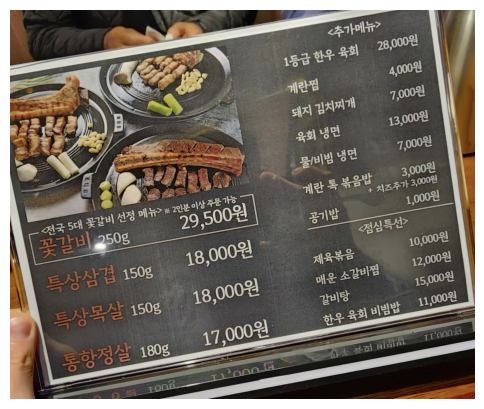

In [2]:
test_img = Image.open("test2.png")
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(test_img)

In [ ]:
# NOTE: Gemma 3 4B부터 멀티모달 입력 지원 (270M, 1B는 이미지 입력 불가능)

API_KEY = "YOUR API KEY"
MODEL = "gemma-3-4b-it" 
IMAGE = Image.open("test2.png")
PROMPT = "이 메뉴판에 있는 음식을 모두 나열해줘. 그리고 여기서 알러지 유발 성분이 무엇인지도 알려줘."

agent = Gemma(api_key=API_KEY, model=MODEL)
response = agent.generate_content(contents=[IMAGE, PROMPT])
agent.print_delay()

print(response)

Response Time:  9.127 seconds
네, 메뉴판에 있는 음식과 알러지 유발 성분을 정리해 드리겠습니다.

**메뉴 목록:**

*   **주가메뉴:**
    *   1등급 한우 육회: 4,000원
    *   게란찜: 7,000원
    *   돼지 김치찌개: 13,000원
    *   육회 냉면: 7,000원
    *   물/비빔 냉면: 3,000원
    *   게란 복 복 음밥 ( + 치즈 추가 3,000원): 3,000원
    *   공기밥: 1,000원
*   **정식 메뉴:**
    *   제육볶음: 10,000원
    *   매운 소갈비찜: 12,000원
    *   갈비탕: 15,000원
    *   한우 육회 비빔밥: 11,000원
*   **고기 메뉴:**
    *   족발살 250g: 18,000원
    *   특상살 150g: 18,000원
    *   특상묵살 150g: 17,000원
    *   동항정살 180g: 17,000원
    *   연근 5대 꽃갈비 선정 메뉴 > 2인분 이상 주문 가능: 29,500원

**알러지 유발 성분:**

*   **돼지고기:** 돼지 김치찌개, 돼지 김치, 돼지 갈비 등 돼지고기가 사용된 메뉴에는 알레르기 반응을 일으킬 수 있습니다.
*   **해산물:** 한우 육회 비빔밥 (게란 복 복 음밥)에 게가 포함되어 있어 게 알레르기가 있는 경우 주의해야 합니다.
*   **우유:** 게란찜, 한우 육회 비빔밥 (게란 복 복 음밥)에 우유가 사용되었을 가능성이 있습니다.
*   **고추:** 선정 메뉴인 연근 5대 꽃갈비에는 고추가 많이 사용되었을 가능성이 높습니다.
*   **기타:** 메뉴에 따라 찹쌀, 쌀, 콩, 양파, 마늘, 대파, 생강, 젓갈 등 다양한 재료가 사용될 수 있으므로, 특정 재료에 알레르기가 있는 경우 주문 전에 확인하는 것이 좋습니다.

**주의:**

*   메뉴에 사용된 재료는 주방 상황에 따라 변경될 수 있습니다.
*   알레르기가 

### [로컬 환경] 사용 예시
- HuggingFace에서 Gemma, SigLIP2를 다운로드해야 하므로, acess token이 필요합니다.

- ```token```의 값을 HuggingFace Access Token으로 설정해 주세요.

- 추가적으로, Gemma 4B 이하(270M, 1B)는 멀티모달 구조가 아니므로 비전 인코더를 추가해야 합니다.

In [ ]:
# model and save directory
model_ids = ["google/gemma-3-270m-it" , "google/gemma-3-1b-it" , "google/siglip2-so400m-patch14-384"]

# download the model snapshot
for model_id in model_ids:
    local_dir = f"./models/{model_id.split('/')[-1]}"
    snapshot_download(
        repo_id=model_id,
        local_dir=local_dir,
        local_dir_use_symlinks=False,
        token="YOUR API KEY" # hugging face token
    )
    print(f"model saved to {local_dir}")    

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]/Users/klee9/Desktop/CAU/2025/2025-2/GDGoC/project/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:979: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(
Fetching 11 files: 100%|██████████| 11/11 [00:00<00:00, 3239.98it/s]


model saved to ./models/gemma-3-270m-it


Fetching 10 files: 100%|██████████| 10/10 [00:00<00:00, 8538.89it/s]


model saved to ./models/gemma-3-1b-it


Fetching 9 files: 100%|██████████| 9/9 [00:00<00:00, 3502.06it/s]

model saved to ./models/siglip2-so400m-patch14-384


### Fine-Tuning
- SigLIP2 encoder + Projector + LM 구조를 이용해 멀티모달 입력을 받도록 할 계획입니다.

- TODO: Fine-tuning에 쓸 데이터셋 구하기, 성능 검증 및 비교

In [3]:
## test inference time for SigLIP-2 ##

# load the model and processor
ckpt = "google/siglip2-so400m-patch14-384"
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = AutoModel.from_pretrained(ckpt, device_map=device, local_files_only=True).eval()
processor = AutoProcessor.from_pretrained(ckpt)

# load the image
image = Image.open("test2.png").convert("RGB")
inputs = processor(images=[image], return_tensors="pt").to(model.device)

# run infernece
start = time.time()
with torch.no_grad():
    image_embeddings = model.get_image_features(**inputs)    
end = time.time()

print(f"Inference time: {end - start:.2f} seconds")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Inference time: 0.20 seconds


In [4]:
model_id = "google/gemma-3-1b-it"

model = Gemma3ForCausalLM.from_pretrained(
    model_id
).eval()

tokenizer = AutoTokenizer.from_pretrained(model_id)

messages = [
    [
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."},]
        },
        {
            "role": "user",
            "content": [{"type": "text", "text": "Write a poem on Hugging Face, the company"},]
        },
    ],
]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device).to(torch.bfloat16)


start = time.time()
with torch.inference_mode():
    outputs = model.generate(**inputs, max_new_tokens=64)
end = time.time()
print(f"Generation time: {end - start:.2f} seconds")
outputs = tokenizer.batch_decode(outputs)


Attempting to cast a BatchEncoding to type torch.bfloat16. This is not supported.


Generation time: 3.63 seconds


In [11]:
## test inference time for SigLIP2 + Gemma 3

# load the model
vision_model = "google/siglip2-so400m-patch14-384"
language_model = "google/gemma-3-1b-it"

image = Image.open("test2.png").convert("RGB")
prompt = "Explain this image."

vlm = VLM(vision_model_id=vision_model, language_model_id=language_model)
vlm.eval()

with torch.no_grad():
    start = time.time()
    output = vlm(image, prompt)
    end = time.time()
print(f"VLM response time: {end - start:.2f} seconds")
print(output)

VLM response time: 3.50 seconds
["Okay, here's an analysis of the image, as an OCR specialist would:\n\n**Overall Impression:**\n\nThe image appears to be a vintage advertisement for a “Kempton” hair product, likely from the 1930s or 40s. It’s a striking, somewhat faded"]


### Test Classification

In [18]:
from transformers import pipeline

# load pipeline
ckpt = "google/siglip2-so400m-patch14-384"
image_classifier = pipeline(model=ckpt, task="zero-shot-image-classification")

# load image and candidate labels
image = Image.open("test2.png").convert("RGB")
candidate_labels = ["식당", "메뉴판", "음식"]

Device set to use mps:0


In [20]:
# run inference
start = time.time()
outputs = image_classifier(image, candidate_labels)
end = time.time()
print(f"Inference time: {end - start:.2f} seconds")
print(outputs[0]['label'])

Inference time: 0.97 seconds
메뉴판
